In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams["font.size"] = 18
plt.rcParams["xtick.labelsize"] = 16
from scipy.special import jv
%matplotlib inline

# Examen 3, en el salon

## Problema 1)

Vamos a graficar unas funciones de Bessel ($m={0,1,2,3}$) usando la implementacion de $J_{i}$ de _scipy.special_.

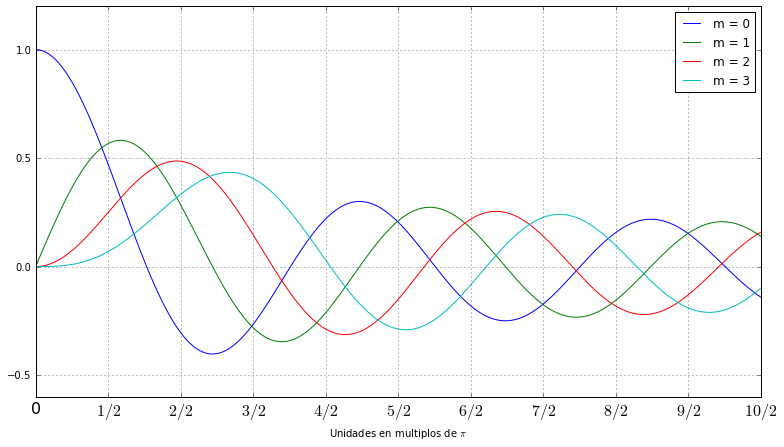

In [2]:
# creamos nuestro intervalo, tomando 10^4 puntos
x = np.linspace(0,5*np.pi,10000,endpoint=True)
# ahora, nuestra figura y los ejes que contendran las graficas
# y las arreglamos bonito
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)
ax.set_xlim(x[0],x[-1])
ax.set_xticks(np.arange(0,5.5*np.pi,0.5*np.pi))
ax.set_xticklabels(["0"]+["${}/2$".format(i) for i in xrange(1,11)])
ax.set_xlabel("Unidades en multiplos de $\pi$")
#colors = cm.ScalarMappable(cmap="ocean").to_rgba(range(7,0,-1)), yo que quería poner colores :'(
# ahora, calculamos los funciones y las graficamos
for m in xrange(4):
    y = jv(m,x)
    lbl = "m = {}".format(m)
    ax.plot(x,y,label=lbl)
ax.legend(); ax.grid(True);

## Problema 2)

A continuación, defino una función para calcular la derivada numérica usando que:

$f\prime(x)=\frac{f(x+h)-f(x)}{h}$

Mi función cálcula $f\prime$ empezando por un paso dado $h$, y luego compara este estimado de la derviada con el que resulta de hacer el calculo con $h/2$. Si la diferencia entre estos valores es menor a un parámetro de tolerancia dado ($err$) la función regresa el último estimado como el resultado; si no, vuelve a subdividir $h$ hasta que cumpla.

In [3]:
def numerical_derivative(func,x,h0=1.0,err=1e-6):
    """
    Returns the numerical derivative of func at point x.
    """
    e,h = 1e4, h0
    while np.all(e>err):
        prime = (func(x+h)-func(x))/h # generate estimate of f'
        h = h/2 # reduce step
        if np.isclose(0.0,h):
            print("h became to small!")
            return None
        next_prime = (func(x+h)-func(x))/h # regenerate estimate
        e = abs(next_prime-prime) # calculate diff between estimates
    return next_prime
# NOTA
# uno, puse h0 grande para poder comparar el efecto de err en la gráfica
# dos, usar np.all me permite que la funcion evalue la derivada para todos los puntos de x a la vez
# pero deja abierta la puerta a que un solo punto donde la derivada es singular eche a perder todo

Hacemos un función que calcule la $f(x)$ indicada por Rich:

$f(x)=x^{3}-5x+2$,  

y a su derivada analítica:

$f\prime(x)=3x^{2}-5$

In [4]:
def f(x):
    return x*x*x-5*x+2
def f_prime(x):
    return 3*x*x-5

Ahora, hacemos la gráfica comparativa

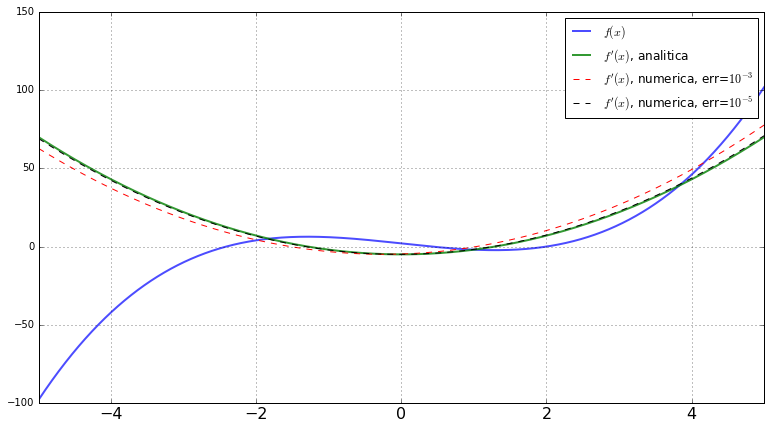

In [5]:
# creamos un intervalo, tomando 10^4 puntos
x = np.linspace(-5,5,10000,endpoint=True)
# ahora, nuestra figura y los ejes que contendran las graficas
# y las arreglamos bonito
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)
ax.set_xlim(x[0],x[-1])
# ahora, calculamos los funciones y las graficamos
plt.plot(x,f(x),label="$f(x)$",lw=2.0,alpha=0.7)
plt.plot(x,f_prime(x),label="$f^{\prime}(x)$, analitica",lw=2.0,color="g",alpha=0.8)
plt.plot(x,numerical_derivative(f,x,err=1e-3),"--",label="$f^{\prime}(x)$, numerica, err=$10^{-3}$",color="r")
plt.plot(x,numerical_derivative(f,x,err=1e-5),"--",label="$f^{\prime}(x)$, numerica, err=$10^{-5}$",color="k")
ax.legend(); ax.grid(True);

## Problema 5)

Si $M$ es una matriz de 2x2:

$$ M = \frac{1}{d}\left( \begin{array}{cc}
d & -b  \\
-c & a  \\ \end{array} \right) $$

La expresion para la inversa de una matriz $M$ es:

$$ I = \frac{1}{d}\left( \begin{array}{cc}
d & -b  \\
-c & a  \\ \end{array} \right) $$

La condición que tiene que cumplir $M$ es que su determinante ($d$) sea no nulo, donde $d$ está dado por:

$$d = ad-bc$$

In [6]:
def inverse2x2(M):
    a,b = M[0][0],M[0][1]
    c,d = M[1][0],M[1][1]
    det = a*d-c*b
    if np.isclose(det,0.0):
        print("No tiene matriz inversa")
        return None
    else:
        I = np.empty_like(M)
        I[0][0],I[0][1] =  d,-b
        I[1][0],I[1][1] = -c, a
        return (1.0/det)*I

Algunas pruebas

In [7]:
M = [[0,0],[0,0]]
inverse2x2(M)

No tiene matriz inversa


In [8]:
M = [[2,1],[0,2]]
inverse2x2(M)

array([[ 0.5 , -0.25],
       [ 0.  ,  0.5 ]])

## Problema 6) 

In [9]:
def suma_numeros(num):
    digits, s = str(abs(num)), 0
    for d in digits:
        try:
            s+=int(d)
        except ValueError:
            continue
    return s

El ejemplo del examen

In [10]:
suma_numeros(39474)

27

Otros ejemplos

In [11]:
suma_numeros(1234567890987654321)

90

In [12]:
suma_numeros(-11.11)

4

Usando notación científica, para exponentes bajos también funciona, pero para grandes exponentes no; posiblemente por la represtesentación que python tiene de los numeros

In [13]:
suma_numeros(1.11e-4)

3

In [14]:
suma_numeros(1.11e-16)

10